NLP ANALYSIS 
Online forum discussion using Scikit-Learn

In [5]:
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups(remove=('headers','footers'))

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [6]:
print(data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [7]:
print(data.data[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


DEFINING ALL THE CATEGORIES

In [8]:
categories=['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

TRAINING THE DATA ON THESE CATEGORIES

In [9]:
train=fetch_20newsgroups(subset='train', categories=categories)

TESTING THE DATA FOR THESE CATEGORIES

In [10]:
test=fetch_20newsgroups(subset='test', categories=categories)

In [11]:
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [12]:
print(test.data[5])

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

In [13]:
#IMPORTING NECESSARY PACCKAGES
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline



In [18]:
#creating a model based on Multinomial Naive Bayes
model=make_pipeline(TfidfVectorizer(), MultinomialNB())


In [20]:
#training the model with the train data
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [22]:
#creating  labels for the test data
labels=model.predict(test.data)

Text(89.133125, 0.5, 'Predicted label')

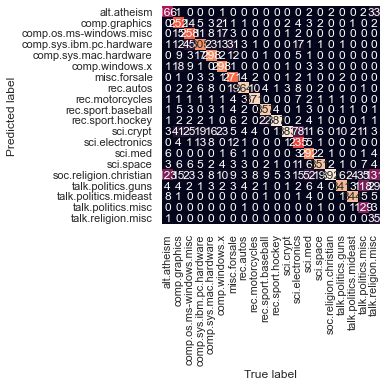

In [25]:
# creating confusion matrix and heatmap
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
           , xticklabels=train.target_names
           ,yticklabels=train.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')


In [34]:
# PREDICTING CATEGORY ON NEW DATA BASED ON TRAINED MODEL

def predict_category(s, train=train, model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [35]:
predict_category('jesus christ')

'soc.religion.christian'

In [45]:
predict_category('prime minister')

'talk.politics.mideast'

In [43]:
predict_category('kennedy')

'talk.politics.guns'